In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, cumulative_trapezoid
from scipy.stats import norm
import pickle
import seaborn as sns
import matplotlib as mpl

In [ ]:
#############################################
# Informal Market Sim
#############################################

# Price grid
ref_price_a = ref_price_b = 100
std_price_a = std_price_b = 1

price_bins = np.linspace(
    min(ref_price_a, ref_price_b) - 5 * std_price_b,
    max(ref_price_a, ref_price_b) + 5 * std_price_a,
    1000
)

# Midpoints and bin width
midpoints = (price_bins[:-1] + price_bins[1:]) / 2
dp = midpoints[1] - midpoints[0]
N = len(midpoints)  # Number of bins

# Parameters
phi_a = phi_b = 15
Delta_a = Delta_b = 0.01
kappa_a = kappa_b = 0.01
gamma_a = gamma_b = 0
mu_a = mu_b = 100
sigma_a = sigma_b = 1

# Precompute source terms 
P_a_vals = (1 / (sigma_a * np.sqrt(2 * np.pi))) * np.exp(- (midpoints - mu_a)**2 / (2 * sigma_a**2))
source_a = phi_a * P_a_vals
source_b = phi_b * P_a_vals  # since P_b == P_a

epsilon = 1e-07

initial_A = 1 * P_a_vals
initial_B = 1 * P_a_vals
hist_a = np.array(initial_A, dtype = np.float64) / dp
hist_b = np.array(initial_B, dtype = np.float64) / dp

hist_a += epsilon
hist_b += epsilon

state0 = np.concatenate((hist_a, hist_b))

# Define the derivative function
def derivs(t, state):
    n_a = state[:N]
    n_b = state[N:]

    # Reverse cumulative sum for integral from p to infinity (n_b)
    cumsum_b_forward = cumulative_trapezoid(n_b, x = midpoints, initial = 0)
    integral_b = cumsum_b_forward[-1] - cumsum_b_forward
     
    # Forward cumulative sum for integral from 0 to p (n_a)
    integral_a = cumulative_trapezoid(n_a, x = midpoints, initial = 0)

    # Compute derivatives
    dna_dt = source_a - kappa_a * (1 - gamma_a) * n_a * integral_b - Delta_a * n_a
    dnb_dt = source_b - kappa_b * (1 - gamma_b) * n_b * integral_a - Delta_b * n_b

    return np.concatenate((dna_dt, dnb_dt))

# Time parameters
T = 1000.0
dt = 0.1
t_eval = np.arange(0, T + dt, dt)

# Solve the ODE system
sol = solve_ivp(derivs, (0, T), state0, t_eval=t_eval, method='RK45')

# Extract and compute total N_a and N_b over time
N_a_total = np.sum(sol.y[:N, :], axis=0) * dp
N_b_total = np.sum(sol.y[N:, :], axis=0) * dp

In [ ]:
with open("Codigos finales para la tesis\\resources\\Simulacion mercado informal\\dist_eq_n_a_integral.pkl", 'wb') as f:
    pickle.dump(sol.y[:N, -1:],f)
with open("Codigos finales para la tesis\\resources\\Simulacion mercado informal\\dist_eq_n_b_integral.pkl", 'wb') as f:
    pickle.dump(sol.y[N:, -1:],f)

In [ ]:
# Section for comparisson between methods

In [ ]:
with open("resources\\Simulacion mercado informal\\n_A_estacionario_1.pkl", 'rb') as f:
    n_a_est_sim_1 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\n_B_estacionario_1.pkl", 'rb') as f:
    n_b_est_sim_1 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\totales_n_a_1.pkl", 'rb') as f:
    n_a_sim_1 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\totales_n_b_1.pkl", 'rb') as f:
    n_b_sim_1 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\times_1.pkl", 'rb') as f:
    times_sim = pickle.load(f)

with open("resources\\Simulacion mercado informal\\n_A_estacionario_2.pkl", 'rb') as f:
    n_a_est_sim_2 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\n_B_estacionario_2.pkl", 'rb') as f:
    n_b_est_sim_2 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\totales_n_a_2.pkl", 'rb') as f:
    n_a_sim_2 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\totales_n_b_2.pkl", 'rb') as f:
    n_b_sim_2 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\n_A_estacionario_3.pkl", 'rb') as f:
    n_a_est_sim_3 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\n_B_estacionario_3.pkl", 'rb') as f:
    n_b_est_sim_3 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\totales_n_a_3.pkl", 'rb') as f:
    n_a_sim_3 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\totales_n_b_3.pkl", 'rb') as f:
    n_b_sim_3 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\n_A_estacionario_4.pkl", 'rb') as f:
    n_a_est_sim_4 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\n_B_estacionario_4.pkl", 'rb') as f:
    n_b_est_sim_4 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\totales_n_a_4.pkl", 'rb') as f:
    n_a_sim_4 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\totales_n_b_4.pkl", 'rb') as f:
    n_b_sim_4 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\n_A_estacionario_5.pkl", 'rb') as f:
    n_a_est_sim_5 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\n_B_estacionario_5.pkl", 'rb') as f:
    n_b_est_sim_5 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\totales_n_a_5.pkl", 'rb') as f:
    n_a_sim_5 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\totales_n_b_5.pkl", 'rb') as f:
    n_b_sim_5 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\n_A_estacionario_6.pkl", 'rb') as f:
    n_a_est_sim_6 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\n_B_estacionario_6.pkl", 'rb') as f:
    n_b_est_sim_6 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\totales_n_a_6.pkl", 'rb') as f:
    n_a_sim_6 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\totales_n_b_6.pkl", 'rb') as f:
    n_b_sim_6 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\n_A_estacionario_7.pkl", 'rb') as f:
    n_a_est_sim_7 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\n_B_estacionario_7.pkl", 'rb') as f:
    n_b_est_sim_7 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\totales_n_a_7.pkl", 'rb') as f:
    n_a_sim_7 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\totales_n_b_7.pkl", 'rb') as f:
    n_b_sim_7 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\n_A_estacionario_8.pkl", 'rb') as f:
    n_a_est_sim_8 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\n_B_estacionario_8.pkl", 'rb') as f:
    n_b_est_sim_8 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\totales_n_a_8.pkl", 'rb') as f:
    n_a_sim_8 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\totales_n_b_8.pkl", 'rb') as f:
    n_b_sim_8 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\n_A_estacionario_9.pkl", 'rb') as f:
    n_a_est_sim_9 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\n_B_estacionario_9.pkl", 'rb') as f:
    n_b_est_sim_9 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\totales_n_a_9.pkl", 'rb') as f:
    n_a_sim_9 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\totales_n_b_9.pkl", 'rb') as f:
    n_b_sim_9 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\n_A_estacionario_10.pkl", 'rb') as f:
    n_a_est_sim_10 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\n_B_estacionario_10.pkl", 'rb') as f:
    n_b_est_sim_10 = pickle.load(f)

with open("resources\\Simulacion mercado informal\\totales_n_a_10.pkl", 'rb') as f:
    n_a_sim_10 = pickle.load(f)
with open("resources\\Simulacion mercado informal\\totales_n_b_10.pkl", 'rb') as f:
    n_b_sim_10 = pickle.load(f)
    
n_a_sim = np.mean(np.array([n_a_sim_1, n_a_sim_2, n_a_sim_3, n_a_sim_4, n_a_sim_5, n_a_sim_6, n_a_sim_7, n_a_sim_8, n_a_sim_9, n_a_sim_10]),axis=0)
n_b_sim = np.mean(np.array([n_b_sim_1,n_b_sim_2, n_b_sim_3, n_b_sim_4, n_b_sim_5, n_b_sim_6, n_b_sim_7, n_b_sim_8, n_b_sim_9, n_b_sim_10]), axis=0)
n_a_est_sim = np.mean(np.array([n_a_est_sim_1,n_a_est_sim_2,n_a_est_sim_3,n_a_est_sim_4,n_a_est_sim_5, n_a_est_sim_6, n_a_est_sim_7, n_a_est_sim_8, n_a_est_sim_9, n_a_est_sim_10]), axis=0)
n_b_est_sim = np.mean(np.array([n_b_est_sim_1,n_b_est_sim_2,n_b_est_sim_3, n_b_est_sim_4, n_b_est_sim_5, n_b_est_sim_6, n_b_est_sim_7, n_b_est_sim_8, n_b_est_sim_9, n_b_est_sim_10]), axis=0)

In [4]:
with open("resources\\Gillespie mercado informal\\n_A_totales_gillespie.pkl", 'rb') as f:
    mean_series_gillespie_a= pickle.load(f)
with open("resources\\Gillespie mercado informal\\n_B_totales_gillespie.pkl", 'rb') as f:
    mean_series_gillespie_b = pickle.load(f)

with open("resources\\Gillespie mercado informal\\n_A_estacionario_gillespie.pkl", 'rb') as f:
    n_a_gillespie_stationary= pickle.load(f)
with open("resources\\Gillespie mercado informal\\n_B_estacionario_gillespie.pkl", 'rb') as f:
    n_b_gillespie_stationary = pickle.load(f)

with open("resources\\Gillespie mercado informal\\times_gillespie.pkl", 'rb') as f:
    common_time = pickle.load(f)

In [5]:
num_sims_gillespie = 5
num_sims_sim = 10

std_n_a_sim = np.std(n_a_sim, axis=0) / np.sqrt(num_sims_sim)

upper_bound_n_a_sim = n_a_sim + std_n_a_sim
lower_bound_n_a_sim = n_a_sim - std_n_a_sim

std_n_b_sim = np.std(n_b_sim, axis=0) / np.sqrt(num_sims_sim)

upper_bound_n_b_sim = n_b_sim + std_n_b_sim
lower_bound_n_b_sim = n_b_sim - std_n_b_sim


std_mean_series_gillespie_a = np.std(mean_series_gillespie_a, axis=0) / np.sqrt(num_sims_gillespie)

upper_bound_mean_series_gillespie_a = mean_series_gillespie_a + std_mean_series_gillespie_a
lower_bound_mean_series_gillespie_a = mean_series_gillespie_a - std_mean_series_gillespie_a

std_mean_series_gillespie_b = np.std(mean_series_gillespie_b, axis=0) / np.sqrt(num_sims_gillespie)

upper_bound_mean_series_gillespie_b = mean_series_gillespie_b + std_mean_series_gillespie_b
lower_bound_mean_series_gillespie_b = mean_series_gillespie_b - std_mean_series_gillespie_b

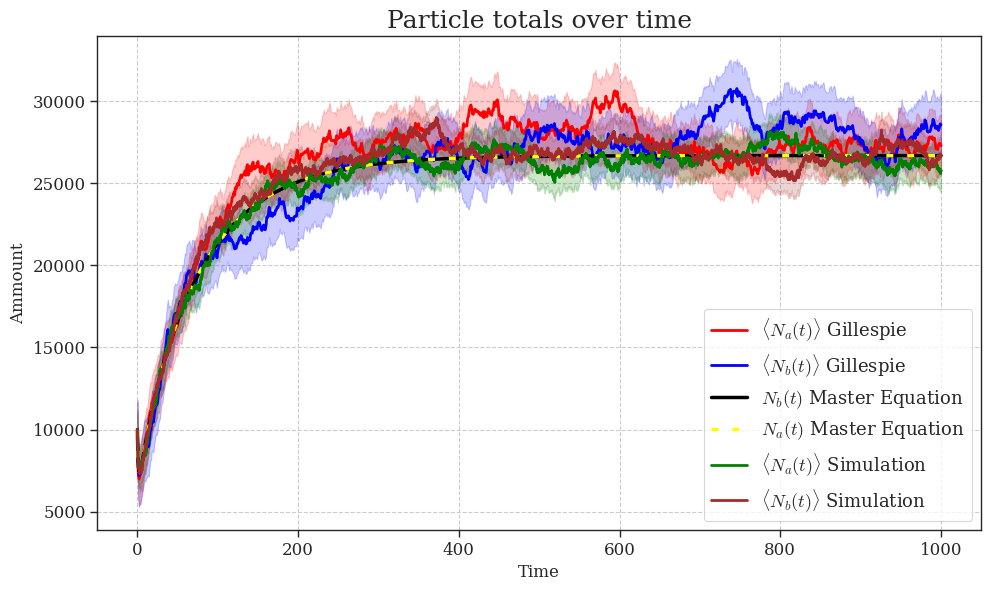

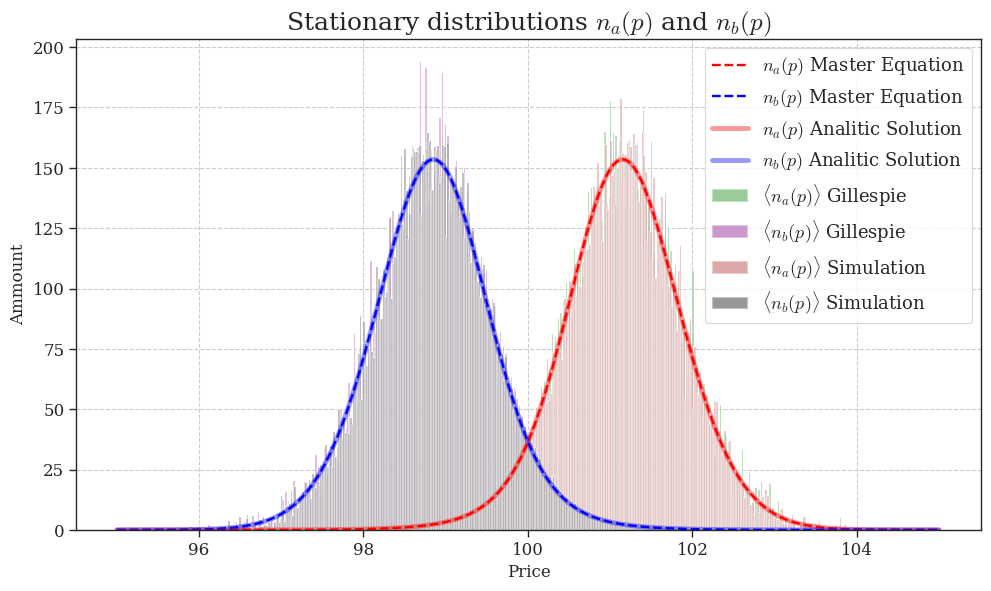

In [ ]:
ref_price_a = ref_price_b = 100
std_price_a = std_price_b = 1

price_bins_simulacion = np.linspace(
    min(ref_price_a, ref_price_b) - 5 * std_price_b,
    max(ref_price_a, ref_price_b) + 5 * std_price_a,
    500
)

# Midpoints and bin width
midpoints_simulacion = (price_bins_simulacion[:-1] + price_bins_simulacion[1:]) / 2
dp_simulacion = midpoints_simulacion[1] - midpoints_simulacion[0]

mu = 100
ref_price_a = ref_price_b = 100
std_price_a = std_price_b = 1

price_bins_gillespie = np.linspace(
    min(ref_price_a, ref_price_b) - 5 * std_price_b,
    max(ref_price_a, ref_price_b) + 5 * std_price_a,
    300
)

# Midpoints and bin width
midpoints_gillespie = (price_bins_gillespie[:-1] + price_bins_gillespie[1:]) / 2
dp_gillespie = midpoints_gillespie[1] - midpoints_gillespie[0]

times_sim = np.linspace(0,1000,10000)

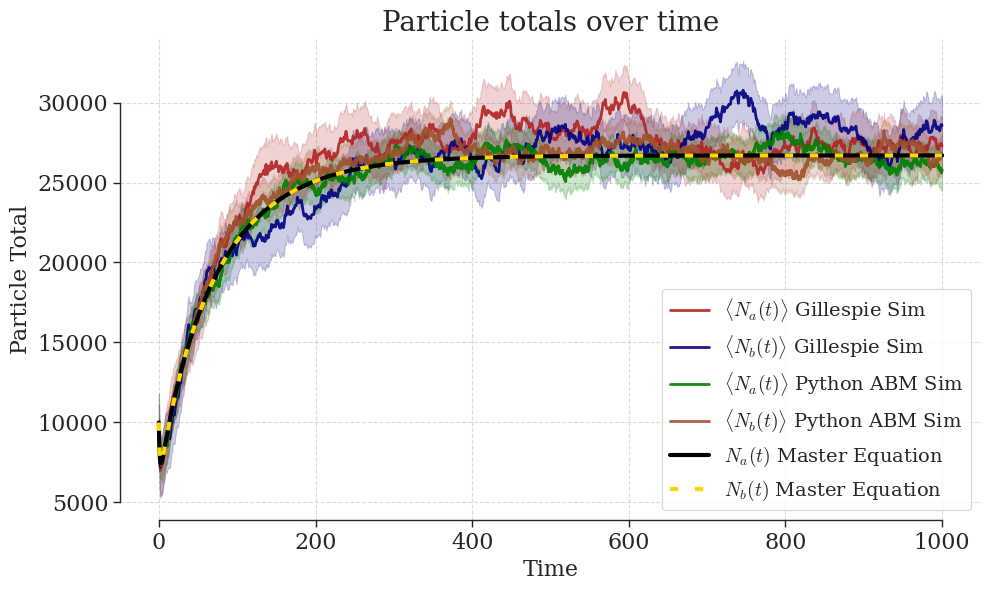

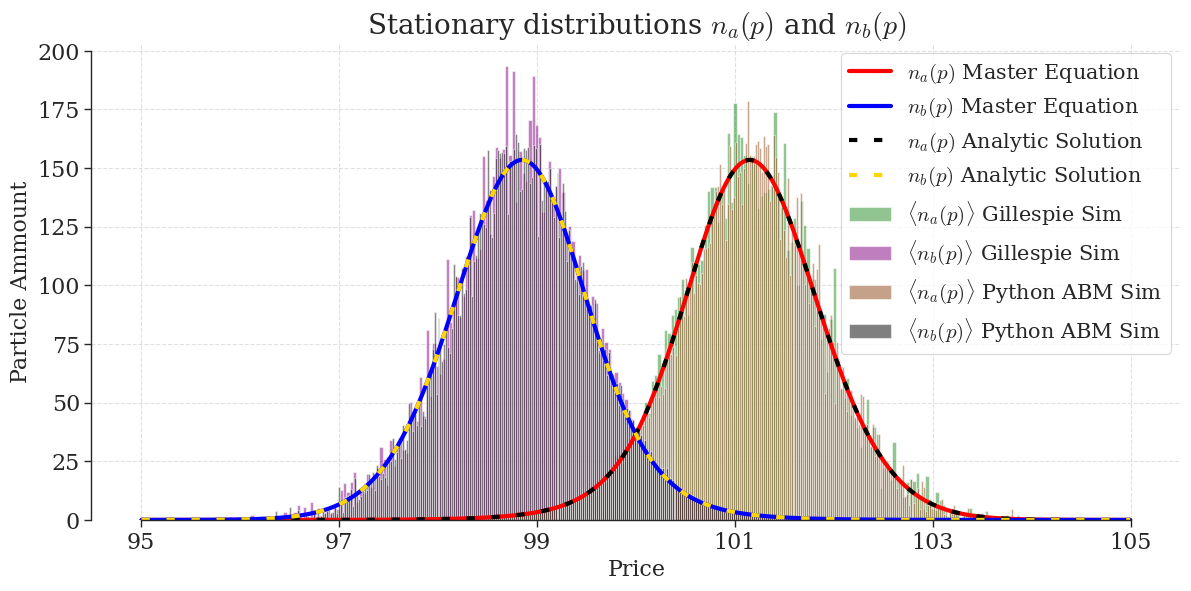

In [ ]:
# Set global style
sns.set(style="ticks", context="paper")
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm' 
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['lines.linewidth'] = 2

plt.figure(figsize=(10, 6))

# Gillespie results
plt.plot(common_time, mean_series_gillespie_a/dp, label=r'$\langle N_a(t) \rangle$ Gillespie Sim', color='firebrick', alpha=0.9)
plt.fill_between(common_time, lower_bound_mean_series_gillespie_a/dp, upper_bound_mean_series_gillespie_a/dp,
                 color='firebrick', alpha=0.2)

plt.plot(common_time, mean_series_gillespie_b/dp, label=r'$\langle N_b(t) \rangle$ Gillespie Sim', color='navy', alpha=0.9)
plt.fill_between(common_time, lower_bound_mean_series_gillespie_b/dp, upper_bound_mean_series_gillespie_b/dp,
                 color='navy', alpha=0.2)

# Simulation
plt.plot(times_sim, n_a_sim/dp, label=r'$\langle N_a(t) \rangle$ Python ABM Sim', color='green', alpha=0.9)
plt.fill_between(times_sim, lower_bound_n_a_sim/dp, upper_bound_n_a_sim/dp,
                 color='green', alpha=0.2)

plt.plot(times_sim, n_b_sim/dp, label=r'$\langle N_b(t) \rangle$ Python ABM Sim', color='sienna', alpha=0.9)
plt.fill_between(times_sim, lower_bound_n_b_sim/dp, upper_bound_n_b_sim/dp,
                 color='sienna', alpha=0.2)
# Master Equation
plt.plot(sol.t, N_a_total/dp, label=r'$N_a(t)$ Master Equation', color='black', linestyle='-', linewidth=3)
plt.plot(sol.t, N_b_total/dp, label=r'$N_b(t)$ Master Equation', color='gold', linestyle=(0, (2, 4)), linewidth=3)

plt.title('Particle totals over time', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.xticks(np.arange(0, 1001, step=200))
plt.ylabel('Particle Total', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best', frameon=True, fancybox=True, shadow=False)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig("images/Mercado Informal/totales de particulas mercado informal.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()


plt.figure(figsize=(12, 6))

# Master Equation 
plt.plot(midpoints, sol.y[:N, -1:], label=r'$n_a(p)$ Master Equation', alpha=1, linewidth=3, color='red', linestyle='-')
plt.plot(midpoints, sol.y[N:, -1:], label=r'$n_b(p)$ Master Equation', alpha=1, linewidth=3, color='blue', linestyle='-')

# Analytical solution
plt.plot(midpoints, sol.y[:N, -1:], label=r'$n_a(p)$ Analytic Solution', alpha=1, linewidth=3, color='black', linestyle=(0, (2, 4)))
plt.plot(midpoints, sol.y[N:, -1:], label=r'$n_b(p)$ Analytic Solution', alpha=1, linewidth=3, color='gold', linestyle=(0, (2, 4)))

# Gillespie stationary distributions
bar_width_gill = dp_gillespie * 1
plt.bar(midpoints_gillespie , n_a_gillespie_stationary, bar_width_gill,
        align="center", alpha=0.5, label=r'$\langle n_a(p) \rangle$ Gillespie Sim', color='forestgreen')
plt.bar(midpoints_gillespie , n_b_gillespie_stationary, bar_width_gill,
        align="center", alpha=0.5, label=r'$\langle n_b(p) \rangle$ Gillespie Sim', color='purple')

# Simulation histograms
bar_width_sim = dp_simulacion * 1
plt.bar(midpoints_simulacion, n_a_est_sim, bar_width_sim,
        align="edge", alpha=0.5, label=r'$\langle n_a(p) \rangle$ Python ABM Sim', color='saddlebrown')
plt.bar(midpoints_simulacion, n_b_est_sim, bar_width_sim,
        align="edge", alpha=0.5, label=r'$\langle n_b(p) \rangle$ Python ABM Sim', color='black')

plt.title(r'Stationary distributions $n_a(p)$ and $n_b(p)$', fontsize=20)
plt.xlabel('Price', fontsize=16)
plt.xticks(np.arange(95, 106, step=2))
plt.ylabel('Particle Ammount', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', frameon=True, fancybox=True, fontsize=15)
sns.despine(trim=True)
plt.tight_layout()
plt.savefig("images/Mercado Informal/perfiles estacionarios mercado informal.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Analytical solution

In [28]:
m_int = sol.y[:N, -1:] * sol.y[N:, -1:]
m_sim = n_a_gillespie_stationary * n_b_gillespie_stationary

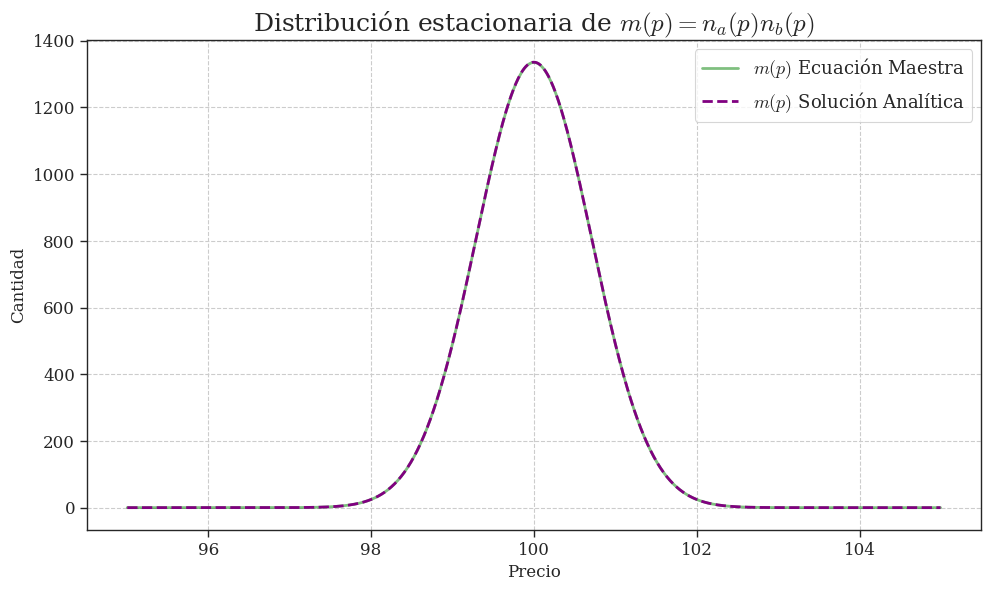

In [ ]:
# Define the Gaussian function I(p)
mu = 100
sigma = 1
I_p = phi_a * norm.pdf(midpoints, loc=mu, scale=sigma)

I_prime_p = np.gradient(I_p, dp)
epsilon = 1e-10
I_p_safe = I_p + epsilon

integrand = I_prime_p / I_p_safe
integral = np.zeros_like(integrand)
for i in range(len(integral)):
    integral[i] = np.trapz(integrand[:i+1], x=midpoints[:i+1])

C = 1.94e-8

m_p = C * np.exp(2 * integral)

# Plot de los perfiles soluciones analiticas
plt.figure(figsize=(10, 6))
plt.plot(midpoints, m_int, label=r'$m(p)$ Ecuación Maestra',alpha=0.5, linewidth = 2, color = 'green', linestyle='-')
plt.plot(midpoints, m_p, label=r'$m(p)$ Solución Analítica ',alpha=1, linewidth = 2, color = 'purple', linestyle='--')
plt.title(r'Distribución estacionaria de $m(p) = n_a(p) n_b(p)$')
plt.xlabel('Precio',fontsize=12)
plt.xticks(fontsize = 12)
plt.ylabel('Cantidad',fontsize=12)
plt.yticks(fontsize = 12)
plt.legend(fontsize=13)
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.savefig("images/Mercado Informal/ perfil m(p).pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

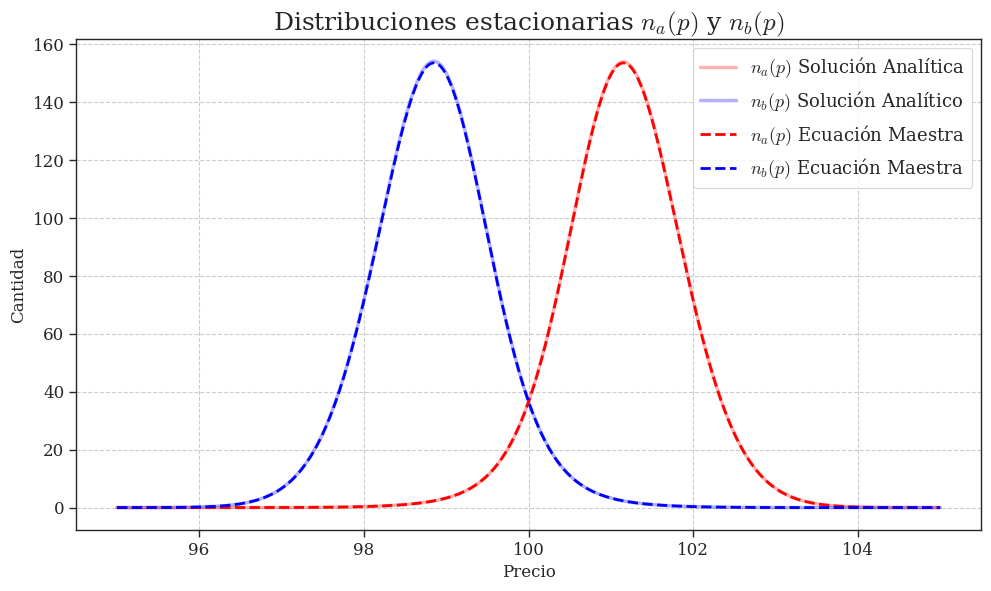

In [ ]:
# Constants
X = -kappa_a   

C_a = 0.85e-5
C_b = 2.29e-3

I_p = phi_a * P_a_vals.copy()

integrand = m_p / I_p
integral_mp_over_I = cumulative_trapezoid(integrand, x=midpoints, initial=0)
sqrt_m_over_C = np.sqrt(m_p / C)

# Compute n_a and n_b
n_a_analitic = C_a * sqrt_m_over_C * np.exp(-X * integral_mp_over_I)
n_b_analitic = C_b * sqrt_m_over_C * np.exp( X * integral_mp_over_I)

# Plot de los perfiles soluciones analiticas
plt.figure(figsize=(10, 6))
plt.plot(midpoints, n_a_analitic, label=r'$n_a(p)$ Solución Analítica',alpha=0.3, linewidth = 2.5, color = 'red', linestyle='-')
plt.plot(midpoints, n_b_analitic, label=r'$n_b(p)$ Solución Analítico ',alpha=0.3, linewidth = 2.5, color = 'blue', linestyle='-')
plt.plot(midpoints, sol.y[:N, -1:], label=r'$n_a(p)$ Ecuación Maestra',alpha=1, linewidth = 2, color = 'red', linestyle='--')
plt.plot(midpoints, sol.y[N:, -1:], label=r'$n_b(p)$ Ecuación Maestra', alpha=1, linewidth = 2, color = 'blue', linestyle='--')
plt.title(r'Distribuciones estacionarias $n_a(p)$ y $n_b(p)$')
plt.xlabel('Precio',fontsize=12)
plt.xticks(fontsize = 12)
plt.ylabel('Cantidad',fontsize=12)
plt.yticks(fontsize = 12)
plt.legend(fontsize=13)
plt.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.savefig("images/Mercado Informal/ perfiles n_a y n_b analiticos.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()